In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
current_path = os.getcwd()

In [3]:
chemin_fichier = os.path.join(current_path, 'Data/df_santepublic_clean.csv')

In [4]:
df = pd.read_csv(chemin_fichier, index_col=False)

/home/bryan/anaconda3/envs/KeFlow/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [6]:
df.shape

(199446, 48)

In [7]:
df.columns

Index(['code', 'brands_tags', 'categories_fr', 'allergens', 'additives_n',
       'additives_fr', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr',
       'pnns_groups_1', 'pnns_groups_2', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'monounsaturated-fat_100g',
       'polyunsaturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'vitamin-a_100g', 'vitamin-c_100g',
       'vitamin-pp_100g', 'potassium_100g', 'calcium_100g', 'iron_100g',
       'nutrition-score-fr_100g', 'clean_product_name',
       'clean_ingredients_text', 'clean_brands', 'clean_labels_fr',
       'clean_main_category_fr', 'clean_countries_fr', 'etatsunis', 'france',
       'suisse', 'allemagne', 'espagne', 'royaumeuni', 'belgique', 'australie',
       'russie', 'italie', 'select_country'],
      dtype='object')

In [8]:
df.rename(columns={'ingredients_from_palm_oil_n': 'ing_w_palm_oil_n',
                   'ingredients_that_may_be_from_palm_oil_n': 'ing_may_be_w_palm_oil_n'},
          inplace=True)

# Analyse bivarié

## Nutrition Grade

### Nutrition score

In [9]:
nutrition_grade = df.groupby(by = 'nutrition_grade_fr')
df_nutrition_grade = df[['nutrition_grade_fr','nutrition-score-fr_100g']].sort_values(by = 'nutrition_grade_fr' )

<AxesSubplot:xlabel='nutrition_grade_fr', ylabel='nutrition-score-fr_100g'>

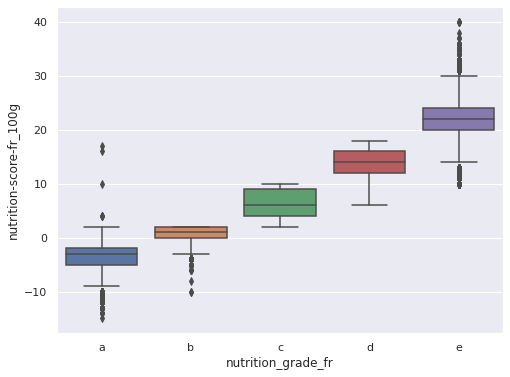

In [10]:
#vérification qu il existe bien une corelation entre le score et le grade:
sns.set_theme(palette="deep")
plt.figure(figsize=(8, 6))
sns.boxplot(x='nutrition_grade_fr', y='nutrition-score-fr_100g', data=df_nutrition_grade)

### Analyse de la variance - Anova

In [11]:
from scipy.stats import f_oneway

In [12]:
a = nutrition_grade.get_group('a').loc[:,'nutrition-score-fr_100g'].values
b = nutrition_grade.get_group('b').loc[:,'nutrition-score-fr_100g'].values
c = nutrition_grade.get_group('c').loc[:,'nutrition-score-fr_100g'].values
d = nutrition_grade.get_group('d').loc[:,'nutrition-score-fr_100g'].values
e = nutrition_grade.get_group('e').loc[:,'nutrition-score-fr_100g'].values

In [13]:
# null hypothesis H0: the population median of all of the groups are equal
statistic_test, pvalue = f_oneway(a,b,c,d,e)
alpha = 0.05
if pvalue < alpha: 
    print(f"la pvalue = {pvalue} < {alpha} So the null hypothesis can be rejected")
else:
    print(f"la pvalue = {pvalue} > {alpha} So the null hypothesis cannot be rejected")

la pvalue = 0.0 < 0.05 So the null hypothesis can be rejected


# Partie modifiée suite a la soutenance

In [14]:
from scipy import stats

In [15]:
#Test de normalité sur la distribution du champ
a = df['nutrition-score-fr_100g']
alpha = 0.05
k2, p = stats.normaltest(a=a, axis=0, nan_policy='omit')
print("p = {:g}".format(p))

# null hypothesis H0: x comes from a normal distribution
if p < alpha: 
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 0
The null hypothesis can be rejected


In [16]:
#Kruskal-Wallis H-test
# null hypothesis H0: the population median of all of the groups are equal
if p < alpha: 
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")
stats.kruskal(a,b,c,d,e)

The null hypothesis can be rejected


KruskalResult(statistic=134297.17317304865, pvalue=0.0)

***** test anova a detailler et expliquer.

### pays

In [17]:
liste_pays = ['etatsunis', 'france', 'suisse', 'allemagne', 'espagne', 
              'royaumeuni','belgique', 'australie', 'russie', 'italie']

In [18]:
liste_pays.append('nutrition_grade_fr')

In [19]:
df2 = df.loc[:,liste_pays].groupby(['nutrition_grade_fr']).sum()
df3 = df2.apply(lambda x:100 * x/ float(x.sum())).round(2).T
df3

nutrition_grade_fr      a      b      c      d      e
etatsunis           15.66  15.53  20.15  28.90  19.76
france              16.70  14.99  21.61  27.71  19.00
suisse              15.49  16.26  22.27  26.36  19.63
allemagne           16.49  13.60  19.92  26.83  23.15
espagne             26.70  16.50  23.89  20.97  11.95
royaumeuni          21.38  14.76  18.60  30.51  14.76
belgique            11.39  13.10  21.67  31.96  21.88
australie           16.22  20.79  19.33  25.57  18.09
russie              13.51  10.81   8.11  21.62  45.95
italie              15.38  14.10  19.23  27.56  23.72

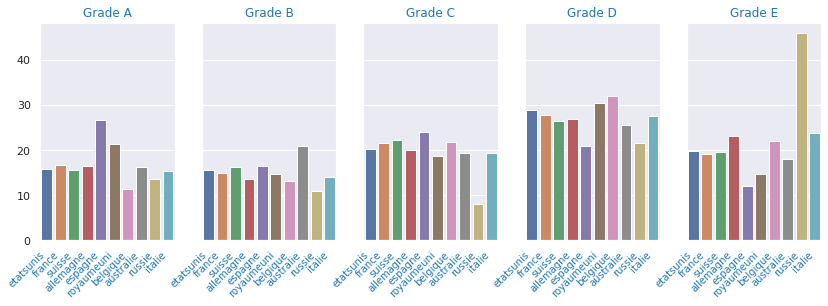

In [20]:

fig, axes =plt.subplots(1,5,figsize=(14, 4), sharey = True)

for ax in axes:
    for xlabel in ax.xaxis.get_ticklabels():
        xlabel.set_color('tab:blue')
        xlabel.set_fontsize(10)
        xlabel.set_rotation(45)
        xlabel.set_ha('right')
        

        
for i, grade in enumerate(['a','b','c','d','e']):
    g = sns.barplot(data = df3, x=df3.index, y=grade, ax = axes[i])
    g.set_ylabel(None)
    g.set_title('Grade ' + grade.upper(), color ='tab:blue')

plt.show()

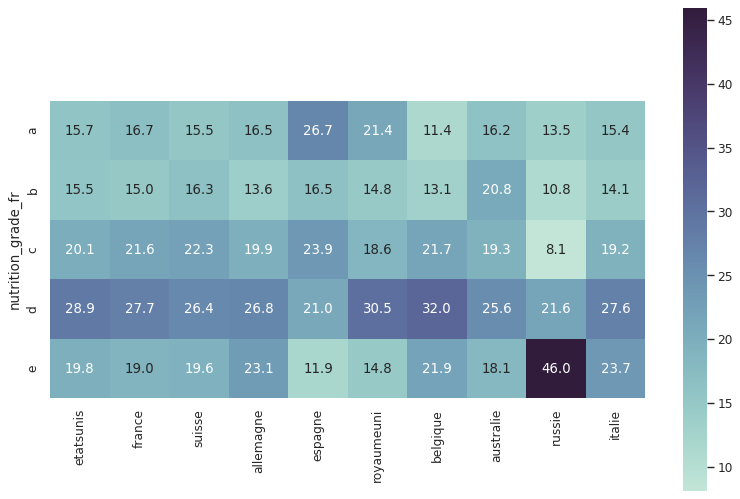

In [21]:
fig = plt.figure(num = None, figsize = (12,8), dpi = 80, facecolor ='w', edgecolor ='k')
custom_cmap = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
res = sns.heatmap(df3.T, annot = True, fmt='.1f', cmap=custom_cmap)
plt.show()

In [22]:
# V de cramer
from scipy.stats.contingency import association
print(f"V de cramer = {(association(df2, method='cramer')*100)} %")

V de cramer = 2.74062133706004 %


In [23]:
# le T de "tschuprow"
association(df2,method="tschuprow")

0.022377079513270958

## Groupe alimentaire N1

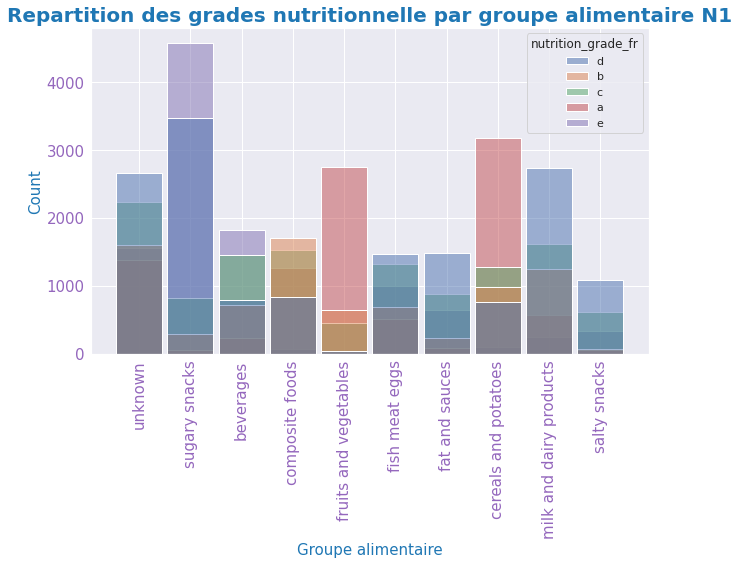

In [24]:
sns.set_theme()
fig, ax =plt.subplots(figsize=(10, 6))

ax = sns.histplot(x='pnns_groups_1',data =df, hue ='nutrition_grade_fr', shrink=0.9)

plt.title("Repartition des grades nutritionnelle par groupe alimentaire N1", fontsize=20, color='tab:blue', fontweight="bold")
plt.ylabel("Count", size = 15,color='tab:blue')
plt.xlabel("Groupe alimentaire", size = 15,color='tab:blue')
ax.tick_params(pad = 0, labelsize=15, colors='tab:purple')
plt.xticks(rotation=90)
                
plt.show()

In [25]:
#tableau de contingences entre pnns-groups_1 et nutritions grade
X = df['pnns_groups_1']
Y = df['nutrition_grade_fr']
data_crosstab = pd.crosstab(X, Y,dropna =True)

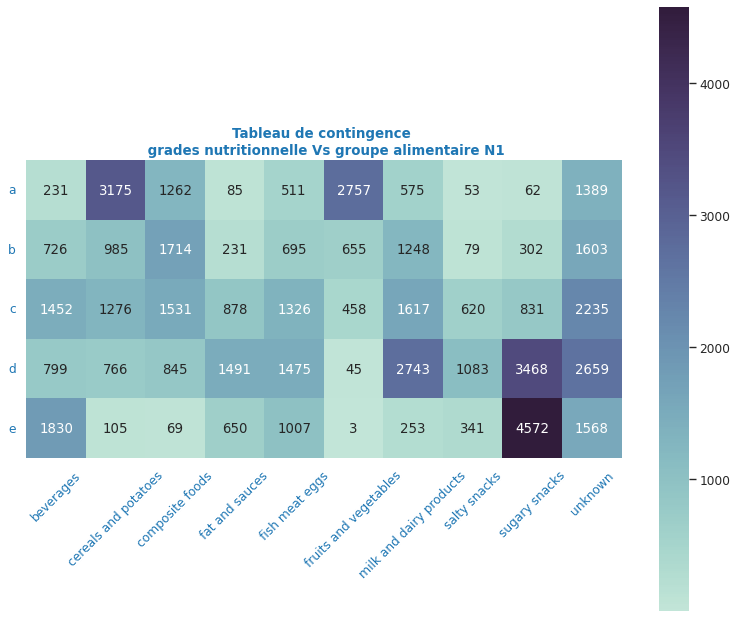

In [26]:
fig = plt.figure(num = None, figsize = (12,10), dpi = 80, facecolor ='w', edgecolor ='k')
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)

res = sns.heatmap(data_crosstab.T, annot = True, fmt='.0f', cmap=custom_cmap)

plt.xlabel(None)
plt.ylabel(None)

plt.xticks(rotation=45, color ='tab:blue')
plt.yticks(rotation=0, color = 'tab:blue')

plt.title("Tableau de contingence \n grades nutritionnelle Vs groupe alimentaire N1", fontsize=12, color='tab:blue', fontweight="bold")
plt.show()

In [27]:
# V de cramer
from scipy.stats.contingency import association
print(f"V de cramer = {(association(data_crosstab, method='cramer')*100)} %")

V de cramer = 36.144470268694675 %


In [28]:
# le T de "tschuprow"
association(data_crosstab,method="tschuprow")

0.29511836393833046

## Groupe alimentaire N2

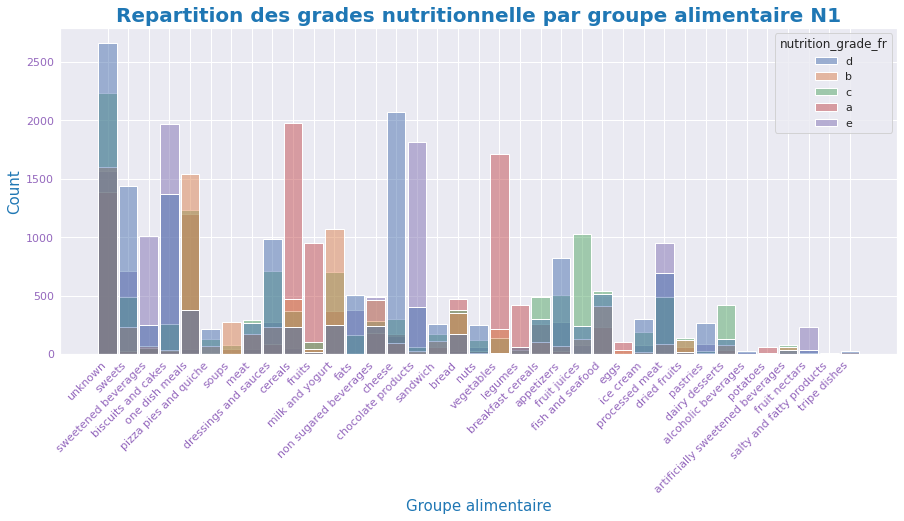

In [29]:
sns.set_theme()
fig, ax =plt.subplots(figsize=(15, 6))

ax = sns.histplot(x='pnns_groups_2',data =df, hue ='nutrition_grade_fr', shrink=0.9)

plt.title("Repartition des grades nutritionnelle par groupe alimentaire N1", fontsize=20, color='tab:blue', fontweight="bold")
plt.ylabel("Count", size = 15,color='tab:blue')
plt.xlabel("Groupe alimentaire", size = 15,color='tab:blue')
ax.tick_params(pad = 0, labelsize=11, colors='tab:purple')
plt.xticks(rotation=45, ha ='right')
                
plt.show()

In [30]:
#tableau de contingences entre pnns-groups_1 et nutritions grade
X = df['pnns_groups_2']
Y = df['nutrition_grade_fr']
data_crosstab = pd.crosstab(X, Y,dropna =True)
data_crosstab

nutrition_grade_fr                   a     b     c     d     e
pnns_groups_2                                                 
alcoholic beverages                  0     2     4    29    16
appetizers                          24    67   501   825   276
artificially sweetened beverages     3    63    76    38    18
biscuits and cakes                  22    34   255  1366  1965
bread                              468   348   378   170    22
breakfast cereals                  255   103   492   302    12
cereals                           1975   468   365   232    55
cheese                             175    90   298  2071   156
chocolate products                  16    28    62   401  1812
dairy desserts                      33    77   423   129    12
dressings and sauces                84   229   713   987   276
dried fruits                        59   122   141    19     0
eggs                               105    35     1     3     0
fats                                 1     2   165   504   374
fish and seafood                   235   408   538   512    14
fruit juices                         0   130  1031   242    80
fruit nectars                        0     1     7    34   227
fruits                             946    42   102    21     3
ice cream                            1    14   190   298    81
legumes                            420    60    32    60    16
meat                               170   168   295   263    43
milk and yogurt                    366  1067   706   245     4
non sugared beverages              179   466   285   239   491
nuts                                29    12   116   247    63
one dish meals                    1195  1537  1229   377    47
pastries                             0     5    29   264    87
pizza pies and quiche               10    69   130   210     2
potatoes                            57     6     9     2     0
processed meat                       1    84   492   697   950
salty and fatty products             0     0     3    11     2
sandwich                            57   108   172   258    20
soups                               39   273    80     0     0
sweetened beverages                 49    66    53   246  1014
sweets                              24   235   485  1437   708
tripe dishes                         1    18     3    25     0
unknown                           1389  1603  2235  2659  1568
vegetables                        1713   218   135     5     0

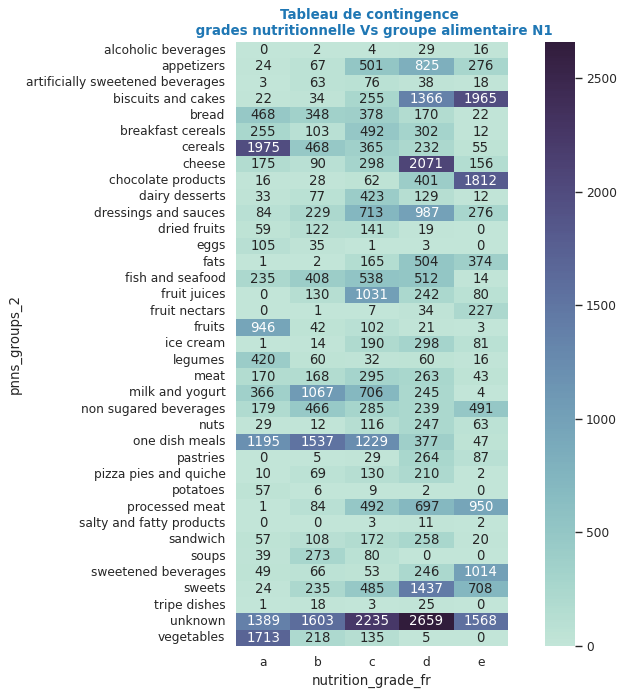

In [31]:
fig = plt.figure(num = None, figsize = (12,10), dpi = 80, facecolor ='w', edgecolor ='k')
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(0.3)
res = sns.heatmap(data_crosstab, annot = True, fmt='.0f', cmap=custom_cmap)

plt.title("Tableau de contingence \n grades nutritionnelle Vs groupe alimentaire N1", fontsize=12, color='tab:blue', fontweight="bold")
plt.show()

In [32]:
# V de cramer
from scipy.stats.contingency import association
print(f"V de cramer = {(association(data_crosstab, method='cramer')*100)} %")

V de cramer = 46.888233731943416 %


In [33]:
# le T de "tschuprow"
association(data_crosstab,method="tschuprow")

0.27070934366963617

## composants alimentaires

In [34]:
#Liste des 6 composants alimentaire
liste_composants = ['fat_100g','carbohydrates_100g','proteins_100g']

In [35]:
nutrition_grade = df.groupby(by = 'nutrition_grade_fr')
df_nutrition_grade_comp = df[['nutrition_grade_fr','fat_100g','carbohydrates_100g','proteins_100g']].sort_values(by = 'nutrition_grade_fr' )

In [36]:
df_nutrition_grade_comp

nutrition_grade_fr   fat_100g  carbohydrates_100g  proteins_100g
153980                  a   0.600000           15.300000           0.50
27382                   a   0.000000           12.000000           0.80
182807                  a   3.000000           81.100000           8.00
56786                   a   0.530000           21.050000           5.26
56785                   a   0.000000           12.980000           4.58
...                   ...        ...                 ...            ...
67767                   e  32.140000            3.570000          25.00
67766                   e  32.140000            3.570000          25.00
158158                  e  33.251121           63.122193          10.50
158160                  e  23.900000           64.900000           5.30
62356                   e  21.430000           39.290000           3.57

[199446 rows x 4 columns]

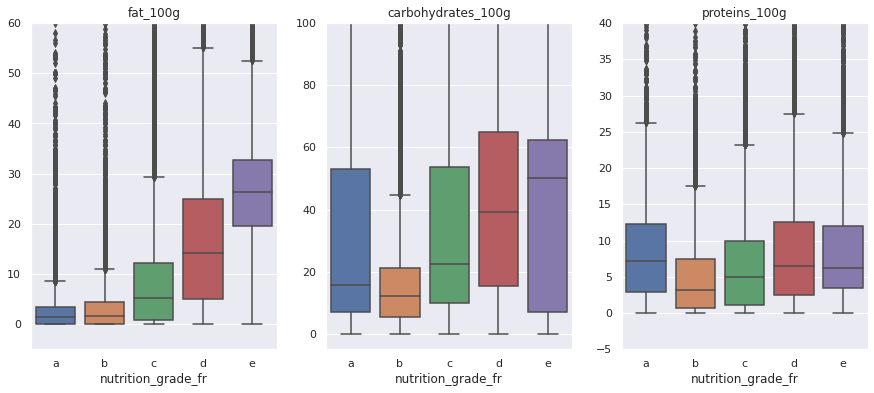

In [37]:
#vérification qu il existe bien une corelation entre le score et le grade:
fig, axes = plt.subplots(1,3, figsize = (15,6), sharey = False)
sns.set_theme(palette="deep")


sns.boxplot(x='nutrition_grade_fr', y='fat_100g', data=df_nutrition_grade_comp, ax = axes[0])
sns.boxplot(x='nutrition_grade_fr', y='carbohydrates_100g', data=df_nutrition_grade_comp, ax = axes[1])
sns.boxplot(x='nutrition_grade_fr', y='proteins_100g', data=df_nutrition_grade_comp, ax = axes[2])

axes[0].set_ylim(-5,60)
axes[0].set_ylabel(None)
axes[0].set_title('fat_100g')

axes[1].set_ylim(-5,100)
axes[1].set_ylabel(None)
axes[1].set_title('carbohydrates_100g')

axes[2].set_ylim(-5,40)
axes[2].set_ylabel(None)
axes[2].set_title('proteins_100g')

plt.show()

## ANOVA 

In [38]:
alpha = 0.05
for composant in ['fat_100g','carbohydrates_100g','proteins_100g']:
    
    df_nutrition_grade = df[['nutrition_grade_fr',composant]].sort_values(by = 'nutrition_grade_fr' )
    a = nutrition_grade.get_group('a').loc[:,composant].values
    b = nutrition_grade.get_group('b').loc[:,composant].values
    c = nutrition_grade.get_group('c').loc[:,composant].values
    d = nutrition_grade.get_group('d').loc[:,composant].values
    e = nutrition_grade.get_group('e').loc[:,composant].values
        
    # null hypothesis H0: the population median of all of the groups are equal
    statistic_test, pvalue = f_oneway(a,b,c,d,e)
    alpha = 0.05
    if pvalue < alpha:
        print(f"Resultat du test ANOVA pour le composant : {composant}")
        print(f"statistic_test = {statistic_test}")
        print(f"la pvalue = {pvalue} < {alpha} So the null hypothesis can be rejected \n")
    else:
        print(f"Resultat du test ANOVA pour le composant : {composant}")
        print(f"statistic_test = {statistic_test}")
        print(f"la pvalue = {pvalue} > {alpha} So the null hypothesis cannot be rejected \n")    

Resultat du test ANOVA pour le composant : fat_100g
statistic_test = 22008.459040899936
la pvalue = 0.0 < 0.05 So the null hypothesis can be rejected 

Resultat du test ANOVA pour le composant : carbohydrates_100g
statistic_test = 4503.765044543773
la pvalue = 0.0 < 0.05 So the null hypothesis can be rejected 

Resultat du test ANOVA pour le composant : proteins_100g
statistic_test = 1432.0828452555359
la pvalue = 0.0 < 0.05 So the null hypothesis can be rejected 



### Nutri-Score

### nutri-score et groupe alimentaire N1

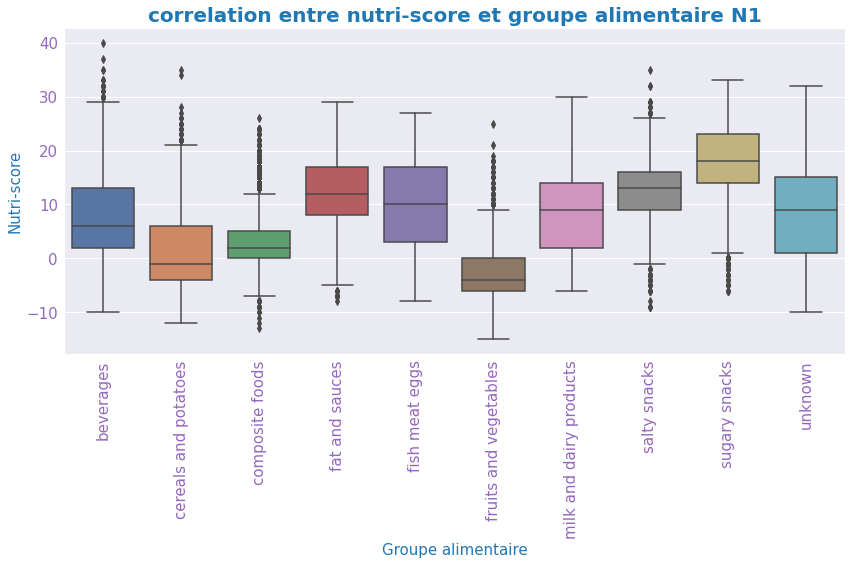

In [39]:
#Verification qu il existe bien une corelation entre le score et le groupe alimentaire N1:
sns.set_theme()
fig, ax = plt.subplots(1,1,figsize=(14, 6))

ax = sns.boxplot(x='pnns_groups_1', y='nutrition-score-fr_100g', data=df.sort_values(by='pnns_groups_1'))

plt.title("correlation entre nutri-score et groupe alimentaire N1", fontsize=20, color='tab:blue', fontweight="bold")


plt.ylabel("Nutri-score", size = 15,color='tab:blue')
plt.xlabel("Groupe alimentaire", size = 15,color='tab:blue')
ax.tick_params(pad = 0, labelsize=15, colors='tab:purple')
plt.xticks(rotation=90)

plt.show()

In [40]:
X = df.groupby(['pnns_groups_1'])['nutrition-score-fr_100g'].agg('mean').sort_values()
col_pnns_group_1 = df.groupby(['pnns_groups_1']).groups.keys()
df_pnns_groups_1_mean=pd.DataFrame(X,col_pnns_group_1)
df_pnns_groups_1_mean = df_pnns_groups_1_mean.sort_values(by='nutrition-score-fr_100g')
df_pnns_groups_1_mean

nutrition-score-fr_100g
fruits and vegetables                  -2.816488
cereals and potatoes                    1.420485
composite foods                         3.432946
beverages                               7.670901
milk and dairy products                 8.235084
unknown                                 8.862915
fish meat eggs                          9.518548
fat and sauces                         12.073463
salty snacks                           12.774816
sugary snacks                          17.712940

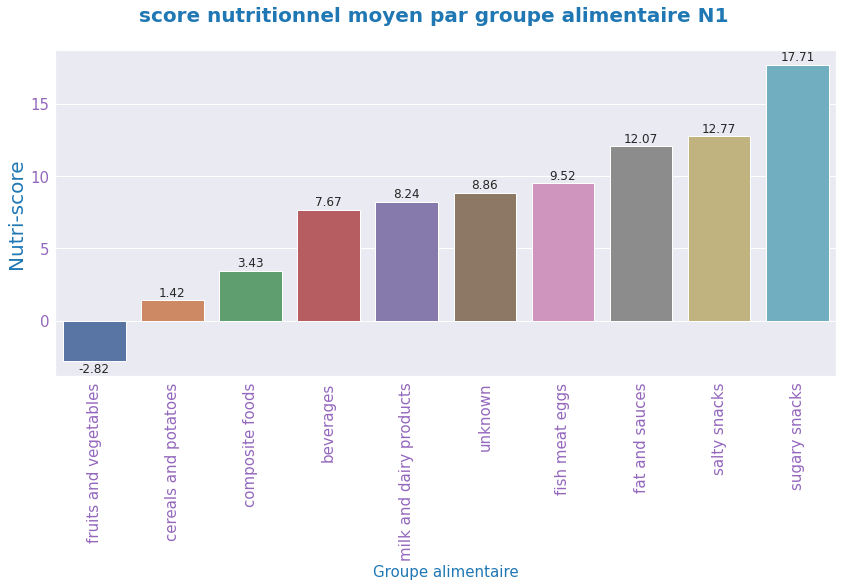

In [41]:
sns.set_theme()

fig , ax = plt.subplots(1,1, figsize =(14,6))

sns.barplot(y='nutrition-score-fr_100g',x =df_pnns_groups_1_mean.index, data=df_pnns_groups_1_mean, ax =ax)

fig.suptitle("score nutritionnel moyen par groupe alimentaire N1", fontsize=20, color='tab:blue', fontweight="bold")
plt.ylabel("Nutri-score", size = 20,color='tab:blue')
plt.xlabel("Groupe alimentaire", size = 15,color='tab:blue')
ax.tick_params(pad = 0, labelsize=15, colors='tab:purple')
plt.xticks(rotation = 90)

for container in ax.containers:
        ax.bar_label(container, padding=1, fmt = '%.2f')

plt.show()

### ANOVA

In [42]:
pnns_groups_1_gb = df.groupby('pnns_groups_1')
df['pnns_groups_1'].unique().tolist()

[nan,
 'unknown',
 'sugary snacks',
 'beverages',
 'composite foods',
 'fruits and vegetables',
 'fish meat eggs',
 'fat and sauces',
 'cereals and potatoes',
 'milk and dairy products',
 'salty snacks']

In [43]:

u = pnns_groups_1_gb.get_group('unknown').loc[:,'nutrition-score-fr_100g'].values
ss = pnns_groups_1_gb.get_group('sugary snacks').loc[:,'nutrition-score-fr_100g'].values
b = pnns_groups_1_gb.get_group('beverages').loc[:,'nutrition-score-fr_100g'].values
cf = pnns_groups_1_gb.get_group('composite foods').loc[:,'nutrition-score-fr_100g'].values
fv = pnns_groups_1_gb.get_group('fruits and vegetables').loc[:,'nutrition-score-fr_100g'].values
fme = pnns_groups_1_gb.get_group('fish meat eggs').loc[:,'nutrition-score-fr_100g'].values
fs = pnns_groups_1_gb.get_group('fat and sauces').loc[:,'nutrition-score-fr_100g'].values
cs = pnns_groups_1_gb.get_group('cereals and potatoes').loc[:,'nutrition-score-fr_100g'].values
mdp = pnns_groups_1_gb.get_group('milk and dairy products').loc[:,'nutrition-score-fr_100g'].values
sn = pnns_groups_1_gb.get_group('salty snacks').loc[:,'nutrition-score-fr_100g'].values


# null hypothesis H0: the population median of all of the groups are equal
statistic_test, pvalue = f_oneway(u,ss,b,cf,fv,fme,fs,cs,mdp,sn)
alpha = 0.05
if pvalue < alpha:
    print(f"Resultat du test ANOVA pour le champ : groupe alimentaire niveau 1 est :")
    print(f"statistic_test = {statistic_test}")
    print(f"la pvalue = {pvalue} < {alpha} So the null hypothesis can be rejected \n")
else:
    print(f"Resultat du test ANOVA pour le champ : groupe alimentaire niveau 1 est :")
    print(f"statistic_test = {statistic_test}")
    print(f"la pvalue = {pvalue} > {alpha} So the null hypothesis cannot be rejected \n")

Resultat du test ANOVA pour le champ : groupe alimentaire niveau 1 est :
statistic_test = 4075.9013086682694
la pvalue = 0.0 < 0.05 So the null hypothesis can be rejected 



### Groupe Alimentaire de niveau 2

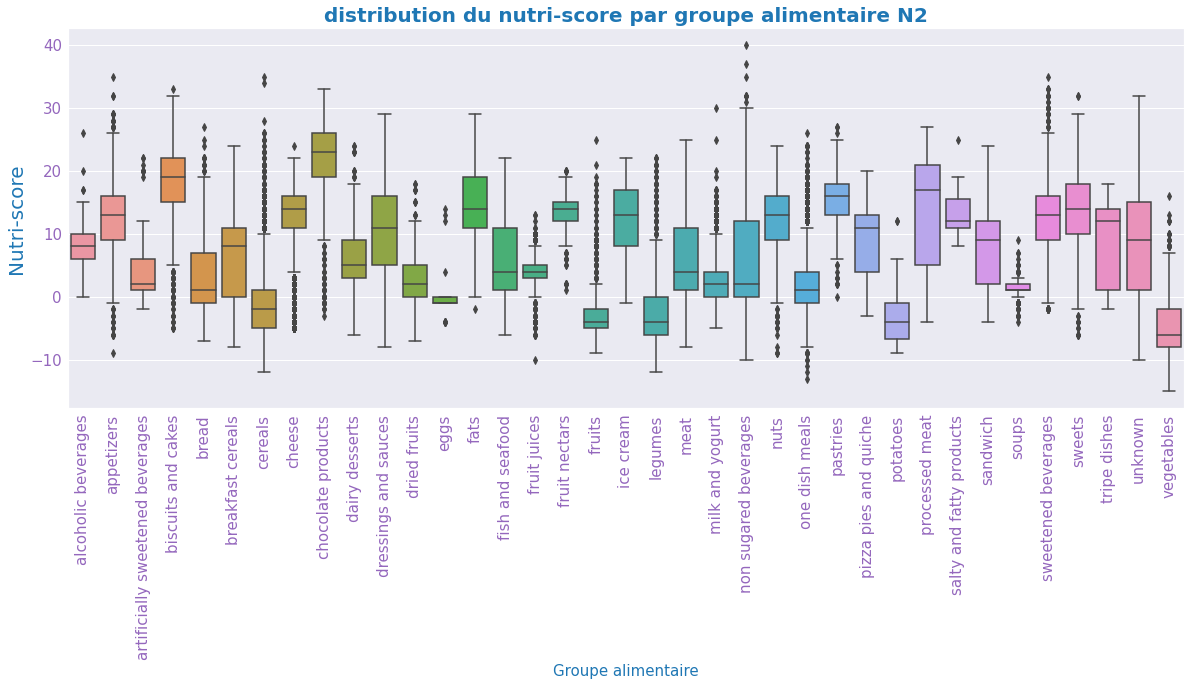

In [44]:
fig, ax = plt.subplots(figsize=(20, 7))
ax = sns.boxplot(x='pnns_groups_2', y='nutrition-score-fr_100g', data=df.sort_values(by = 'pnns_groups_2'))

plt.title("distribution du nutri-score par groupe alimentaire N2", fontsize=20, color='tab:blue', fontweight="bold")

plt.ylabel("Nutri-score", size = 20,color='tab:blue')
plt.xlabel("Groupe alimentaire", size = 15,color='tab:blue')
ax.tick_params(pad = 0, labelsize=15, colors='tab:purple')
plt.xticks(rotation = 90)
        
plt.show()

In [45]:
X = df.groupby(['pnns_groups_2'])['nutrition-score-fr_100g'].agg('mean')
col_pnns_group_2 = df.groupby(['pnns_groups_2']).groups.keys()
df_pnns_groups_2_mean=pd.DataFrame(X,col_pnns_group_2)
df_pnns_groups_2_mean = df_pnns_groups_2_mean.sort_values(by='nutrition-score-fr_100g')
df_pnns_groups_2_mean

nutrition-score-fr_100g
vegetables                                      -4.760019
potatoes                                        -3.013514
fruits                                          -2.462298
legumes                                         -0.982993
eggs                                            -0.576389
cereals                                         -0.548950
soups                                            1.382653
one dish meals                                   2.314709
milk and yogurt                                  2.790201
dried fruits                                     3.002933
bread                                            3.104618
artificially sweetened beverages                 4.055556
fruit juices                                     4.074848
fish and seafood                                 5.321031
meat                                             5.671991
breakfast cereals                                6.147766
dairy desserts                                   6.253709
non sugared beverages                            6.339157
sandwich                                         7.804878
tripe dishes                                     8.063830
pizza pies and quiche                            8.693587
unknown                                          8.862915
alcoholic beverages                              8.882353
dressings and sauces                            10.486239
nuts                                            12.162741
ice cream                                       12.412671
sweetened beverages                             12.422969
cheese                                          12.499642
appetizers                                      12.936208
fruit nectars                                   13.148699
salty and fatty products                        13.562500
sweets                                          14.132572
processed meat                                  15.017986
pastries                                        15.464935
fats                                            15.546845
biscuits and cakes                              18.294344
chocolate products                              21.633463

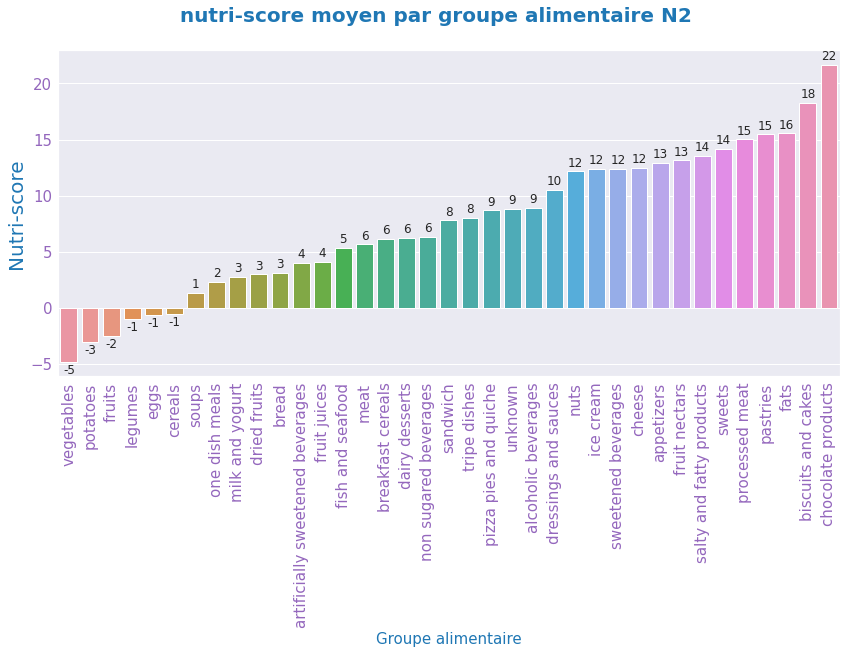

In [46]:
fig, ax = plt.subplots(1,1,figsize=(14, 6))
sns.barplot(y='nutrition-score-fr_100g',x =df_pnns_groups_2_mean.index, data=df_pnns_groups_2_mean)

fig.suptitle("nutri-score moyen par groupe alimentaire N2", fontsize=20, color='tab:blue', fontweight="bold")
plt.ylabel("Nutri-score", size = 20,color='tab:blue')
plt.xlabel("Groupe alimentaire", size = 15,color='tab:blue')
ax.tick_params(pad = 0, labelsize=15, colors='tab:purple')
plt.xticks(rotation = 90)

for container in ax.containers:
        ax.bar_label(container, padding=2, fmt='%.0f')
        
plt.show()

# Analyse multivarié

### Matrrice de variance covariance

In [47]:
#on selectionne les variables ou les corrélations sont le plus élevé
corr_df = df.corr(method='pearson')
X = corr_df.abs().sum()
X.sort_values(ascending = False)
cond = X > 4
rqdCol = X[cond].index
rqdCol

Index(['energy_100g', 'fat_100g', 'saturated-fat_100g',
       'monounsaturated-fat_100g', 'polyunsaturated-fat_100g',
       'carbohydrates_100g', 'potassium_100g', 'nutrition-score-fr_100g'],
      dtype='object')

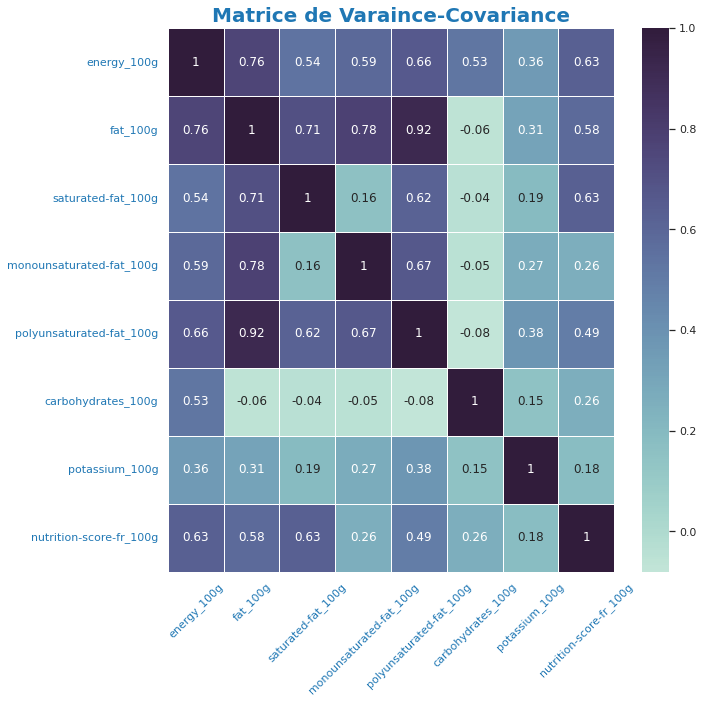

In [48]:
corr_df =df.loc[:,rqdCol].corr(method='pearson')
plt.figure(figsize=(10, 10))
sns.heatmap(corr_df.round(2), annot=True,cmap=custom_cmap, linewidths=1)
plt.title("Matrice de Varaince-Covariance", fontsize=20, color='tab:blue', fontweight="bold")

plt.xticks(color ='tab:blue', rotation = 45)
plt.yticks(color ='tab:blue')
plt.show()

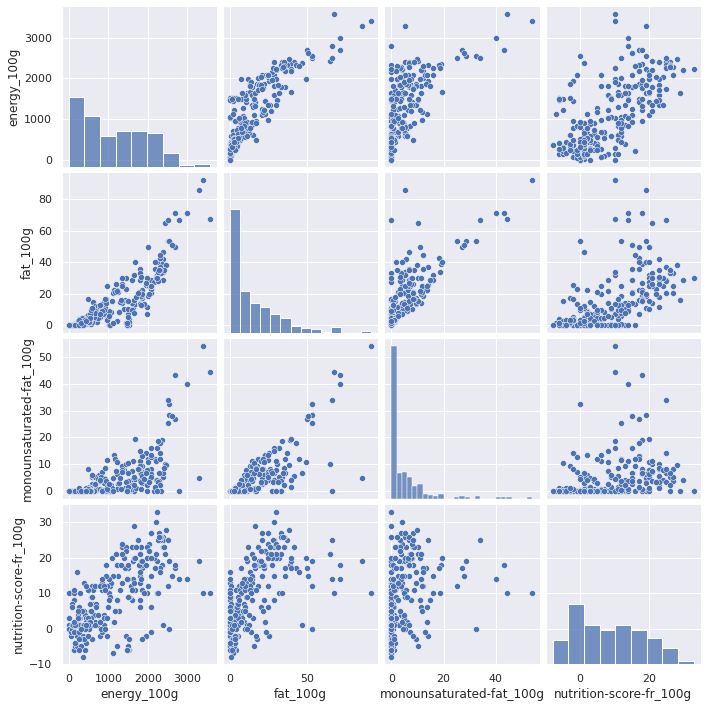

In [49]:
liste_champs = ['energy_100g', 'fat_100g', 'monounsaturated-fat_100g', 'nutrition-score-fr_100g']
df_graph = df.loc[:,liste_champs].sample(250)
sns.pairplot(df_graph)

## Mise en place de PCA

In [50]:
df.drop(['clean_countries_fr', 'etatsunis', 'france','suisse',
         'allemagne', 'espagne', 'royaumeuni', 'belgique', 'australie',
         'russie', 'italie', 'select_country', 'salt_100g'], axis = 1, inplace = True)

In [51]:
def correlation_graph(pca, 
                      x_y, 
                      features,
                      min_inertie = 0) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 10))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):
   
        xi = pca.components_[x_y[0], i]
        yi = pca.components_[x_y[1], i]
        
        alpha = np.arctan(yi/xi)
        xc = np.cos(alpha)
        yc = np.sin(alpha)

        if (abs(xi)>0.2) or (abs(yi)>0.2):
            
            # Les flèches
            ax.arrow(0,0, 
                     pca.components_[x_y[0], i],
                     pca.components_[x_y[1], i],
                     head_width=0.04,
                     head_length=0.08,
                     width=0.02, )
            
            #pointillée & labels
            
            #représentation des champs avec une inertie minimun
            inertie = np.sqrt(xi**2 + yi**2)
            if  inertie> min_inertie:
            
                #cas 1 : xi et yi sont positif            
                if xi>=0 and yi>=0:
                
                    plt.plot([0, xc], [0, yc], color='red', ls='--', lw=0.4)
                    plt.text(xc,yc,
                             s = features[i], ha = 'left',va= 'bottom', rotation = alpha *180/np.pi,
                             color ='tab:blue')
                
                #cas 2 : xi positif et yi negatif
                elif xi>0 and yi<0:
                
                    plt.plot([0, xc], [0, yc], color='red', ls='--', lw=0.4)
                    plt.text(xc,yc,
                             s = features[i],ha = 'left', va = 'top', rotation = alpha *180/np.pi,
                             color ='tab:blue')
        
                #cas 3 : xi et yi sont négatif           
                elif xi<0 and yi<0:
                
                    plt.plot([0, -xc], [0, -yc], color='red', ls='--', lw=0.4)
                    plt.text(-xc,-yc,
                             s = features[i], ha = 'right',va= 'top', rotation = alpha *180/np.pi,
                             color ='tab:blue')
                
                #cas 4 : xi négatif et yi positif           
                else:
                
                    plt.plot([0, -xc], [0, -yc], color='red', ls='--', lw=0.4)
                    plt.text(-xc,-yc,
                             s = features[i], ha = 'right',va= 'bottom', rotation = alpha *180/np.pi,
                             color ='tab:blue')    
    
    
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # J'ai copié collé le code sans le lire
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    ax.set_xlim(-1.4,1.4)
    ax.set_ylim(-1.4,1.4)
    #plt.axis('equal')
    plt.show(block=False)

In [52]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8],
                                fontsize = 10,
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en une dataframe
    X_ = pd.DataFrame(X_projected)
   
    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # On définit x et y 
    x, y = x_y
    
    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    
    # On rajoute la color, les clusters et les labels à X_
    X_["clusters"] =  clusters if clusters is not None else "None" 
    X_["labels"] =  labels if labels is not None else "None"
    c_unique_list = X_["clusters"].sort_values().unique()
    c_dict = {j:i+1 for i, j in enumerate(c_unique_list)}
    X_["colors"] = X_["clusters"].apply(lambda i : c_dict[i])
    
    
    # Pour chaque couleur / cluster
    for c in sorted(X_.clusters.unique()) : 
        # On selectionne le sous DF
        sub_X =X_.loc[X_.clusters == c, : ]

        # Clusters and color
        cluster = sub_X.clusters.iloc[0]
        color = sub_X.colors.iloc[0]

        # On affiche les points
        ax.scatter(    sub_X.iloc[:, x], 
                        sub_X.iloc[:, y], 
                        alpha=alpha, 
                        label = cluster ,
                        cmap="Set1", 
                        marker=marker)
        
    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_.iloc[:, x]).max() *1.1
    y_max = np.abs(X_.iloc[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if labels is not None :
        for i,coord in enumerate(np.array(X_.loc[:,(x,y)])):
            plt.text(coord[0]+(x_max/20),coord[1]+(y_max/20), labels[i], fontsize=fontsize, ha='center',va='center')
            

    # Titre, legend et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")

    if clusters is not None: 
        plt.legend()
    plt.show()

## PCA  avec nutri-grade en index

In [53]:
df_nutri_grade = df.groupby(by=['nutrition_grade_fr']).mean()

In [54]:
df_nutri_grade

additives_n  ing_w_palm_oil_n  ing_may_be_w_palm_oil_n  \
nutrition_grade_fr                                                           
a                      1.031128          0.002377                 0.023021   
b                      1.719635          0.005368                 0.041975   
c                      1.966662          0.015795                 0.061322   
d                      2.501473          0.026834                 0.079083   
e                      2.276190          0.046865                 0.063233   

                    energy_100g   fat_100g  saturated-fat_100g  \
nutrition_grade_fr                                               
a                    724.867926   2.999914            0.410769   
b                    525.685458   3.963617            0.827376   
c                    996.197547   9.720564            2.020839   
d                   1467.507383  17.425946            5.832143   
e                   1825.862206  27.338792           13.958356   

                    monounsaturated-fat_100g  polyunsaturated-fat_100g  \
nutrition_grade_fr                                                       
a                                   1.163399                  0.800914   
b                                   1.548875                  1.076246   
c                                   4.099380                  2.762902   
d                                   5.936587                  4.758090   
e                                   5.637371                  7.148463   

                    trans-fat_100g  cholesterol_100g  ...  fiber_100g  \
nutrition_grade_fr                                    ...               
a                         0.023871          0.012058  ...    4.515192   
b                         0.014926          0.012218  ...    1.787601   
c                         0.038656          0.013416  ...    3.229467   
d                         0.092901          0.021221  ...    2.537126   
e                         0.127938          0.039378  ...    1.621374   

                    proteins_100g  sodium_100g  vitamin-a_100g  \
nutrition_grade_fr                                               
a                        8.333145     0.131151        0.000170   
b                        5.154005     0.209824        0.000123   
c                        6.966249     0.693401        0.000153   
d                        8.583086     0.649537        0.000130   
e                        9.167804     0.597804        0.000131   

                    vitamin-c_100g  vitamin-pp_100g  potassium_100g  \
nutrition_grade_fr                                                    
a                         0.009204         0.003132        0.281750   
b                         0.011028         0.005419        0.219737   
c                         0.008904         0.011172        0.324883   
d                         0.006306         0.018726        0.357366   
e                         0.002311         0.023557        0.385324   

                    calcium_100g  iron_100g  nutrition-score-fr_100g  
nutrition_grade_fr                                                    
a                       0.067452   0.002888                -3.424978  
b                       0.058177   0.001133                 0.907069  
c                       0.076947   0.002664                 6.367260  
d                       0.099166   0.003303                14.064967  
e                       0.180773   0.002915                21.976290  

[5 rows x 22 columns]

In [55]:
df_nutri_grade.shape

(5, 22)

In [56]:
#split data.
X = df_nutri_grade.values
names = df_nutri_grade.index.tolist()
features = df_nutri_grade.columns

In [57]:
#standardisasation des données
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [58]:
idx = ['mean', 'std']
pd.DataFrame(X_scaled).describe().round(2).loc[idx,:]

0     1     2     3     4     5     6     7     8     9   ...    12  \
mean -0.00 -0.00 -0.00 -0.00  0.00  0.00  0.00 -0.00 -0.00 -0.00  ... -0.00   
std   1.12  1.12  1.12  1.12  1.12  1.12  1.12  1.12  1.12  1.12  ...  1.12   

        13    14    15    16    17    18    19    20    21  
mean -0.00 -0.00  0.00 -0.00  0.00 -0.00  0.00  0.00 -0.00  
std   1.12  1.12  1.12  1.12  1.12  1.12  1.12  1.12  1.12  

[2 rows x 22 columns]

In [59]:
#pca
n_components = 4
pca_grade =PCA(n_components = n_components)
pca_grade.fit(X_scaled)
pca_grade.explained_variance_ratio_

array([0.77060019, 0.14138943, 0.07479864, 0.01321174])

In [60]:
scree = (pca_grade.explained_variance_ratio_*100).round(2)
scree_cum = scree.cumsum().round(2)

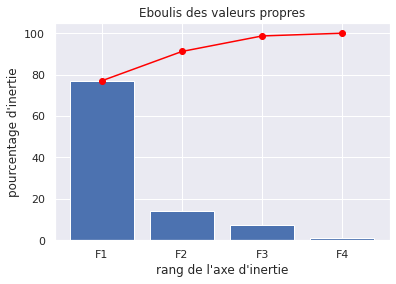

In [61]:
x_list = range(1, n_components +1)

plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')

plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")


plt.xticks(np.arange(1, 5, step=1))  # Set label locations.
plt.xticks(np.arange(1,5), ['F1', 'F2', 'F3', 'F4'])  # Set text labels.

plt.show(block=False)

In [62]:
pcs = pca_grade.components_
pcs = pd.DataFrame(pcs)
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.T.round(2)

F1    F2    F3    F4
additives_n               0.20  0.22 -0.31 -0.13
ing_w_palm_oil_n          0.24  0.04  0.11  0.17
ing_may_be_w_palm_oil_n   0.19  0.15 -0.43 -0.09
energy_100g               0.24 -0.07  0.03 -0.04
fat_100g                  0.24  0.03  0.10  0.07
saturated-fat_100g        0.23  0.04  0.27  0.10
monounsaturated-fat_100g  0.23  0.02 -0.26 -0.02
polyunsaturated-fat_100g  0.24  0.03  0.06  0.07
trans-fat_100g            0.24 -0.03  0.10 -0.19
cholesterol_100g          0.22  0.03  0.32  0.08
carbohydrates_100g        0.21 -0.24 -0.16 -0.22
sugars_100g               0.24  0.04 -0.02 -0.11
fiber_100g               -0.13 -0.48 -0.12  0.02
proteins_100g             0.17 -0.38  0.12 -0.35
sodium_100g               0.19  0.02 -0.44  0.56
vitamin-a_100g           -0.10 -0.49 -0.00  0.49
vitamin-c_100g           -0.23  0.09 -0.21 -0.02
vitamin-pp_100g           0.24  0.05 -0.03 -0.01
potassium_100g            0.22 -0.20 -0.10  0.16
calcium_100g              0.22 -0.02  0.31  0.23
iron_100g                 0.14 -0.43 -0.18 -0.25
nutrition-score-fr_100g   0.24  0.09  0.02  0.07

<AxesSubplot:>

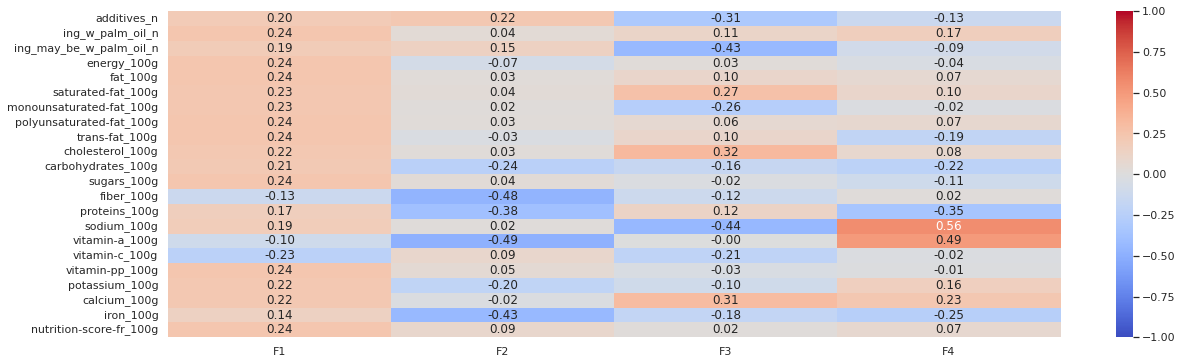

In [63]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

## Corrélation graphique

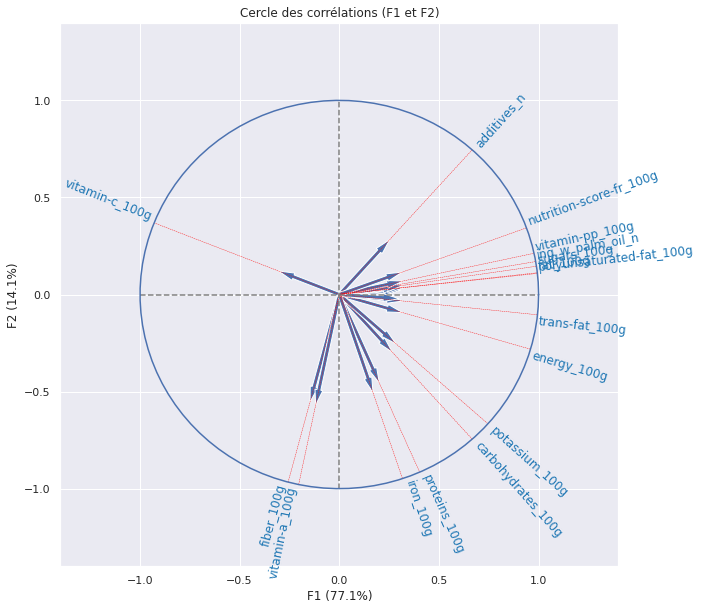

In [64]:
x_y = (0,1)
correlation_graph(pca_grade,x_y,features, min_inertie = 0.24)

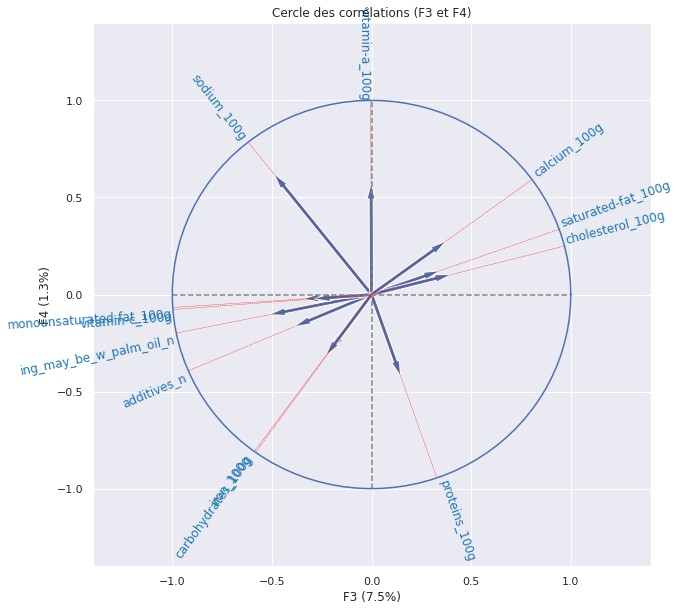

In [65]:
x_y = (2,3)
correlation_graph(pca_grade,x_y,features)

In [66]:
X_proj = pca_grade.transform(X_scaled)

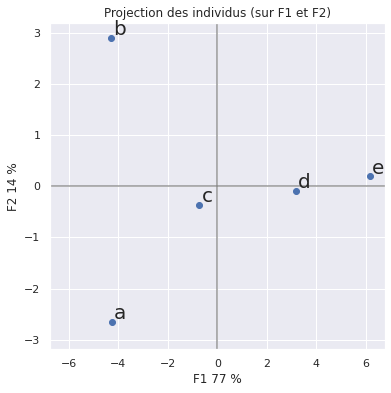

In [67]:
x_y = [0,1]
display_factorial_planes(X_proj, x_y, pca_grade, labels=names, figsize=(6,6),fontsize = 20, marker="o")

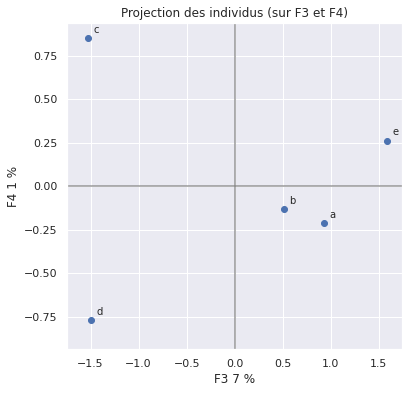

In [68]:
x_y = [2,3]
display_factorial_planes(X_proj, x_y, pca_grade, labels=names, figsize=(6,6), marker="o")

# Projection des produits alimentaires sur F1 et F2

In [69]:
#split data
X = df.select_dtypes(include = 'float').values
features = df.select_dtypes(include = 'float').columns
X_scaled = scaler.transform(X)

In [70]:
X_proj = pca_grade.transform(X_scaled)
X_proj = pd.DataFrame(X_proj, columns = ['F1','F2','F3','F4'])

In [71]:
df1 = X_proj
df2 = df[['pnns_groups_2','pnns_groups_1', 'nutrition_grade_fr']]
df_graph = df1.join(df2)
cond = df_graph['pnns_groups_2'] != 'unknown'
df_graph[cond]
df_graph = df_graph[cond]

In [72]:
df_graph.describe()

F1             F2             F3             F4
count  189992.000000  189992.000000  189992.000000  189992.000000
mean        0.529449      -0.049158      -0.134686      -0.114201
std        19.774265      47.453346      22.516706      30.836643
min     -2726.366419  -14287.629213   -6093.960197   -8356.306981
25%        -3.975380      -1.972091      -0.770719      -4.376551
50%        -0.090471       2.430768       1.014064      -1.567333
75%         3.788553       5.468210       2.772317       1.298712
max      4795.875441    1083.427265    2945.662654    3415.478805

## Creation d'un dictionnaire pour affecter une couleur precise a un catégorie précise

In [73]:
liste_pnns_groups_2 = df.groupby(by='pnns_groups_2').mean().sort_values(by = 'fiber_100g', ascending = False)
liste_pnns_groups_2['fiber_100g']

pnns_groups_2
salty and fatty products            8.592154
legumes                             7.535977
breakfast cereals                   6.955686
nuts                                6.747637
dried fruits                        6.614914
bread                               5.122812
chocolate products                  4.761750
cereals                             4.305282
appetizers                          4.018432
vegetables                          2.979788
unknown                             2.803207
biscuits and cakes                  2.784343
fats                                2.569805
potatoes                            2.236744
fruits                              2.113723
sandwich                            2.075094
one dish meals                      2.036343
sweets                              1.984259
pastries                            1.982417
fish and seafood                    1.816862
pizza pies and quiche               1.712336
cheese                              1.650

In [74]:
liste_pnns_groups_2['fiber_100g'].index

Index(['salty and fatty products', 'legumes', 'breakfast cereals', 'nuts',
       'dried fruits', 'bread', 'chocolate products', 'cereals', 'appetizers',
       'vegetables', 'unknown', 'biscuits and cakes', 'fats', 'potatoes',
       'fruits', 'sandwich', 'one dish meals', 'sweets', 'pastries',
       'fish and seafood', 'pizza pies and quiche', 'cheese', 'meat', 'eggs',
       'tripe dishes', 'dressings and sauces', 'soups', 'processed meat',
       'dairy desserts', 'non sugared beverages', 'milk and yogurt',
       'ice cream', 'fruit juices', 'sweetened beverages',
       'artificially sweetened beverages', 'fruit nectars',
       'alcoholic beverages'],
      dtype='object', name='pnns_groups_2')

In [75]:
teneur_fibre = liste_pnns_groups_2['fiber_100g'].values
teneur_fibre

array([8.59215359, 7.53597659, 6.95568589, 6.74763747, 6.61491416,
       5.1228121 , 4.76174968, 4.30528184, 4.01843189, 2.97978831,
       2.80320674, 2.78434335, 2.56980536, 2.23674369, 2.11372304,
       2.07509382, 2.03634349, 1.98425893, 1.98241738, 1.81686179,
       1.71233562, 1.650866  , 1.58469145, 1.44846943, 1.43143152,
       1.30740942, 1.08318311, 0.96005709, 0.89857524, 0.89775113,
       0.83642638, 0.8144718 , 0.35787512, 0.29201187, 0.22293613,
       0.19385415, 0.16422365])

In [76]:
liste_color = sns.light_palette(color = "seagreen", n_colors=37, reverse=True, as_cmap=False, input="rgb")
list(liste_color)

[(0.1803921568627451, 0.5450980392156862, 0.3411764705882353),
 (0.20073521938781072, 0.5562462658821782, 0.3573472751437103),
 (0.22107828191287635, 0.5673944925486702, 0.37351807969918527),
 (0.24142134443794197, 0.5785427192151622, 0.3896888842546602),
 (0.2617644069630076, 0.5896909458816542, 0.4058596888101352),
 (0.28210746948807325, 0.6008391725481462, 0.42203049336561016),
 (0.3024505320131389, 0.6119873992146382, 0.4382012979210851),
 (0.32279359453820444, 0.6231356258811301, 0.45437210247656007),
 (0.3431366570632701, 0.6342838525476221, 0.47054290703203505),
 (0.36638587137763085, 0.6470246830236129, 0.48902382652400644),
 (0.38672893390269647, 0.658172909690105, 0.5051946310794814),
 (0.40707199642776215, 0.669321136356597, 0.5213654356349564),
 (0.4274150589528277, 0.6804693630230889, 0.5375362401904313),
 (0.4477581214778934, 0.6916175896895809, 0.5537070447459063),
 (0.46810118400295897, 0.7027658163560729, 0.5698778493013813),
 (0.48844424652802454, 0.7139140430225649, 

In [77]:
key_list = liste_pnns_groups_2['fiber_100g'].index
value_list = list(liste_color)

palette = dict(zip(key_list, value_list))
palette

{'salty and fatty products': (0.1803921568627451,
  0.5450980392156862,
  0.3411764705882353),
 'legumes': (0.20073521938781072, 0.5562462658821782, 0.3573472751437103),
 'breakfast cereals': (0.22107828191287635,
  0.5673944925486702,
  0.37351807969918527),
 'nuts': (0.24142134443794197, 0.5785427192151622, 0.3896888842546602),
 'dried fruits': (0.2617644069630076, 0.5896909458816542, 0.4058596888101352),
 'bread': (0.28210746948807325, 0.6008391725481462, 0.42203049336561016),
 'chocolate products': (0.3024505320131389,
  0.6119873992146382,
  0.4382012979210851),
 'cereals': (0.32279359453820444, 0.6231356258811301, 0.45437210247656007),
 'appetizers': (0.3431366570632701, 0.6342838525476221, 0.47054290703203505),
 'vegetables': (0.36638587137763085, 0.6470246830236129, 0.48902382652400644),
 'unknown': (0.38672893390269647, 0.658172909690105, 0.5051946310794814),
 'biscuits and cakes': (0.40707199642776215,
  0.669321136356597,
  0.5213654356349564),
 'fats': (0.4274150589528277, 

In [78]:
 for color in sns.choose_light_palette(input="rgb", as_cmap=False):
        print(color)

interactive(children=(FloatSlider(value=0.5, description='r', max=1.0), FloatSlider(value=0.5, description='g'…

(0.9434690570672918, 0.9435003519833232, 0.9433775380219181)
(0.8947744155069617, 0.8948022741184877, 0.8946929456116683)
(0.8460797739466316, 0.8461041962536522, 0.8460083532014184)
(0.7956460380448612, 0.7956669013222155, 0.7955850253479455)
(0.7469513964845311, 0.7469688234573799, 0.7469004329376956)
(0.6965176605827607, 0.6965315285259432, 0.6964771050842226)
(0.6478230190224306, 0.6478334506611078, 0.6477925126739728)
(0.5973892831206602, 0.597396155729671, 0.5973691848204996)
(0.5486946415603301, 0.5486980778648355, 0.5486845924102499)
(0.5, 0.5, 0.5)


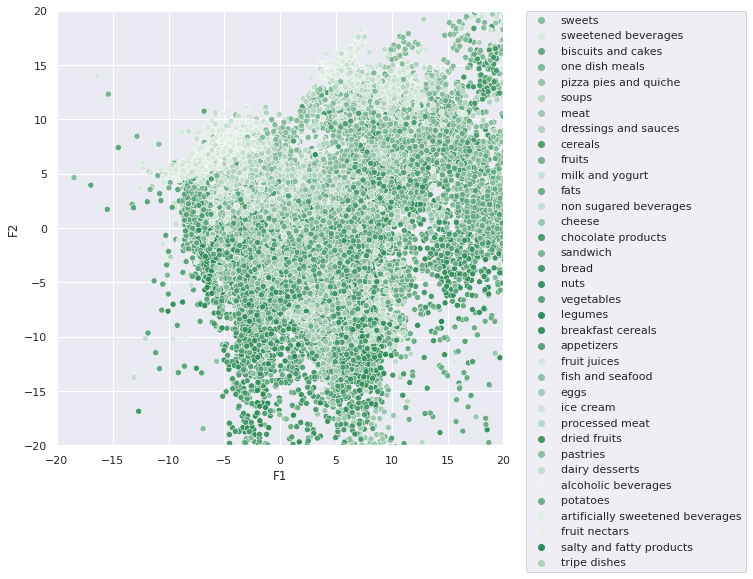

In [80]:
fig, ax = plt.subplots(1,1, figsize=(8,8))

sns.scatterplot(data = df_graph, x = 'F1', y ='F2', hue= 'pnns_groups_2', palette = palette)

ax.set_xlim(-20,20)
ax.set_ylim(-20,20)
ax.set_xlabel("F1")
ax.set_ylabel("F2")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

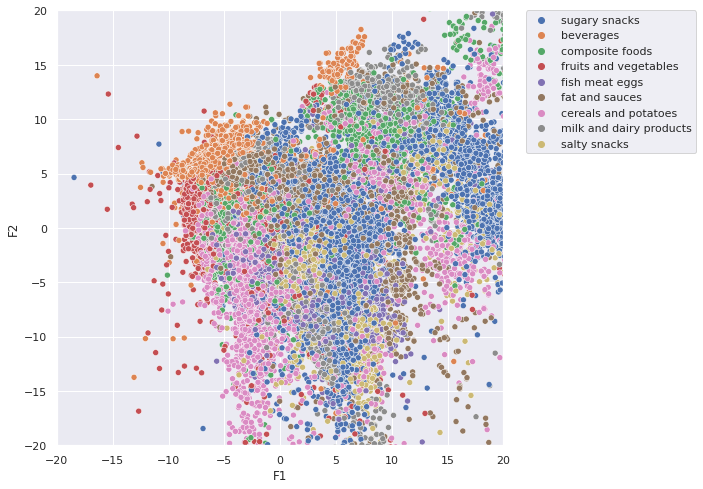

In [81]:
fig, ax = plt.subplots(1,1, figsize=(8,8))

sns.scatterplot(data = df_graph, x = 'F1', y ='F2', hue= 'pnns_groups_1', cmap="Set2")

ax.set_xlim(-20,20)
ax.set_ylim(-20,20)
ax.set_xlabel("F1")
ax.set_ylabel("F2")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

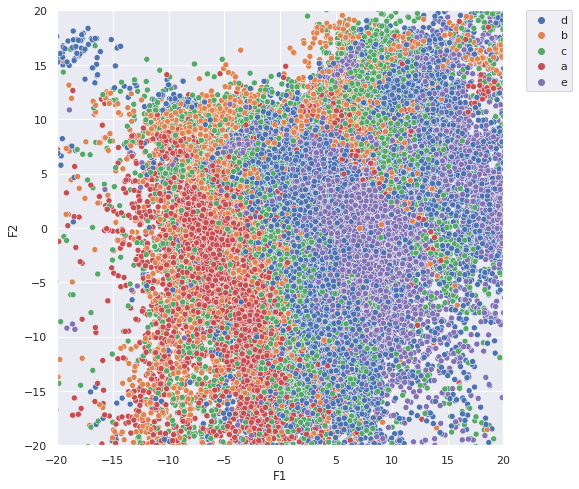

In [82]:
fig, ax = plt.subplots(1,1, figsize=(8,8))

sns.scatterplot(data = df_graph, x = 'F1', y ='F2', hue= 'nutrition_grade_fr', cmap="Set2")

ax.set_xlim(-20,20)
ax.set_ylim(-20,20)
ax.set_xlabel("F1")
ax.set_ylabel("F2")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

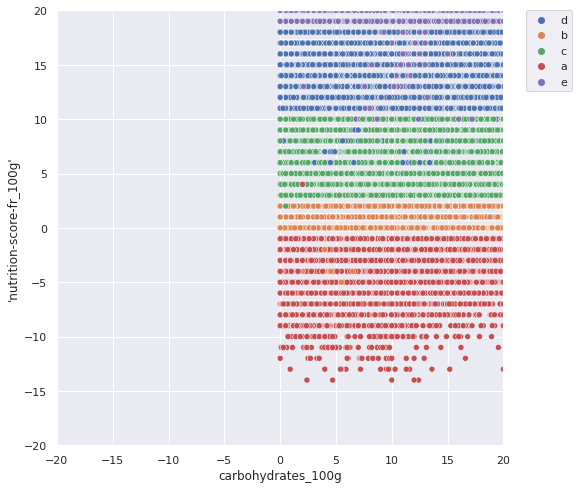

In [83]:
fig, ax = plt.subplots(1,1, figsize=(8,8))

sns.scatterplot(data = df, y = 'nutrition-score-fr_100g', x ='carbohydrates_100g', hue= 'nutrition_grade_fr', cmap="Set2")

ax.set_xlim(-20,20)
ax.set_ylim(-20,20)
ax.set_xlabel("carbohydrates_100g")
ax.set_ylabel("'nutrition-score-fr_100g'")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## PCA sur les pnns groups 2

In [84]:
#creation de la database
df_pnns_groups_2 = df.groupby(by=['pnns_groups_2'], dropna =True).mean()
df_pnns_groups_2

additives_n  ing_w_palm_oil_n  \
pnns_groups_2                                                     
alcoholic beverages                  1.072561          0.001124   
appetizers                           1.754358          0.082560   
artificially sweetened beverages     5.479798          0.005051   
biscuits and cakes                   3.839912          0.292293   
bread                                1.596144          0.103466   
breakfast cereals                    1.637412          0.162495   
cereals                              0.684694          0.024172   
cheese                               0.840291          0.002863   
chocolate products                   1.496833          0.099961   
dairy desserts                       3.277921          0.027979   
dressings and sauces                 1.923929          0.008799   
dried fruits                         0.634874          0.016296   
eggs                                 0.482086          0.000491   
fats                                 0.939367          0.109382   
fish and seafood                     1.048387          0.004098   
fruit juices                         0.708018          0.000886   
fruit nectars                        1.625577          0.002241   
fruits                               1.126138          0.000327   
ice cream                            5.094717          0.144722   
legumes                              0.598480          0.021312   
meat                                 1.908396          0.002701   
milk and yogurt                      1.471592          0.002857   
non sugared beverages                1.464877          0.003143   
nuts                                 0.409432          0.039741   
one dish meals                       2.324568          0.036659   
pastries                             3.757047          0.194483   
pizza pies and quiche                3.298716          0.110875   
potatoes                             1.480595          0.148752   
processed meat                       2.679316          0.005755   
salty and fatty products             1.249348          0.254349   
sandwich                             6.673241          0.075727   
soups                                0.563561          0.005165   
sweetened beverages                  2.644748          0.005780   
sweets                               2.888060          0.101433   
tripe dishes                         0.446809          0.000000   
unknown                              1.902015          0.068067   
vegetables                           0.533290          0.002465   

                                  ing_may_be_w_palm_oil_n  energy_100g  \
pnns_groups_2                                                            
alcoholic beverages                              0.013461   291.421569   
appetizers                                       0.223050  2013.135641   
artificially sweetened beverages                 0.101010   108.791616   
biscuits and cakes                               0.296266  1880.005923   
bread                                            0.429352  1372.920224   
breakfast cereals                                0.154738  1688.760567   
cereals                                          0.043101  1339.788911   
cheese                                           0.024146  1196.940000   
chocolate products                               0.068916  2177.370242   
dairy desserts                                   0.279340   651.144659   
dressings and sauces                             0.087499   929.403329   
dried fruits                                     0.043861  1471.418768   
eggs                                             0.004891   611.715833   
fats                                             0.255164  2659.395889   
fish and seafood                                 0.031070   765.605097   
fruit juices                                     0.019896   200.144936   
fruit nectars                                    0.050283   196.023792   
fruits        

In [85]:
#split data 
X = df_pnns_groups_2.values
names = df_pnns_groups_2.index
features = df_pnns_groups_2.columns

In [86]:
#scaling
scaler.fit(X)
X_scaled = scaler.transform(X)

In [87]:
idx=['mean', 'std']
pd.DataFrame(X_scaled).describe().round(2).loc[idx,:]

0     1     2     3     4     5     6     7     8     9   ...    12  \
mean  0.00  0.00  0.00 -0.00  0.00  0.00  0.00 -0.00  0.00  0.00  ... -0.00   
std   1.01  1.01  1.01  1.01  1.01  1.01  1.01  1.01  1.01  1.01  ...  1.01   

        13    14    15    16    17    18    19    20    21  
mean  0.00 -0.00 -0.00 -0.00 -0.00 -0.00  0.00  0.00 -0.00  
std   1.01  1.01  1.01  1.01  1.01  1.01  1.01  1.01  1.01  

[2 rows x 22 columns]

In [88]:
#pca
n_components = 4
pca_pnns= PCA(n_components=n_components)
pca_pnns.fit(X_scaled)

PCA(n_components=4)

In [89]:
scree = pca_pnns.explained_variance_ratio_
scree

array([0.38700233, 0.21612934, 0.1135913 , 0.09431344])

In [90]:
scree_cum = scree.cumsum()
scree_cum

array([0.38700233, 0.60313167, 0.71672297, 0.81103641])

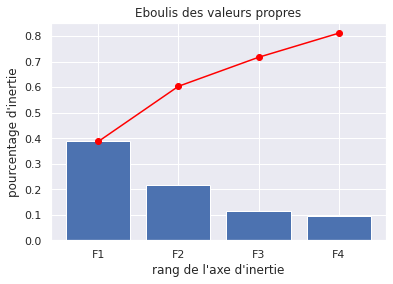

In [91]:
x_list = range(1, n_components +1)

plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')

plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")


plt.xticks(np.arange(1, 5, step=1))  # Set label locations.
plt.xticks(np.arange(1,5), ['F1', 'F2', 'F3', 'F4'])  # Set text labels.

plt.show(block=False)

In [92]:
pcs = pca_pnns.components_
pcs = pd.DataFrame(pcs)
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.T.round(2)

F1    F2    F3    F4
additives_n              -0.02  0.21 -0.33 -0.34
ing_w_palm_oil_n          0.15  0.28  0.05 -0.15
ing_may_be_w_palm_oil_n   0.05  0.21 -0.20 -0.30
energy_100g               0.32  0.13  0.13  0.00
fat_100g                  0.32 -0.06 -0.09  0.17
saturated-fat_100g        0.29 -0.01 -0.21  0.14
monounsaturated-fat_100g  0.29 -0.09  0.03  0.18
polyunsaturated-fat_100g  0.32 -0.07 -0.10  0.18
trans-fat_100g            0.28  0.11 -0.19  0.26
cholesterol_100g          0.21 -0.28 -0.26  0.05
carbohydrates_100g        0.07  0.38  0.28 -0.07
sugars_100g               0.03  0.37 -0.01  0.16
fiber_100g                0.17  0.08  0.51  0.02
proteins_100g             0.14 -0.19  0.19 -0.43
sodium_100g               0.11 -0.15  0.06 -0.43
vitamin-a_100g            0.16 -0.35  0.11  0.03
vitamin-c_100g           -0.24 -0.05  0.11  0.33
vitamin-pp_100g           0.05  0.39 -0.12  0.04
potassium_100g            0.31  0.06  0.24  0.05
calcium_100g              0.24 -0.20 -0.07 -0.25
iron_100g                 0.18  0.08  0.33 -0.05
nutrition-score-fr_100g   0.22  0.16 -0.27 -0.10

<AxesSubplot:>

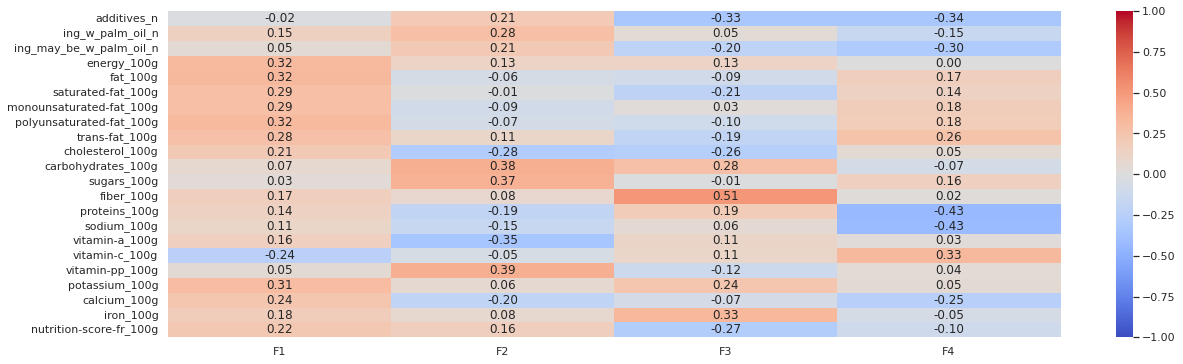

In [93]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

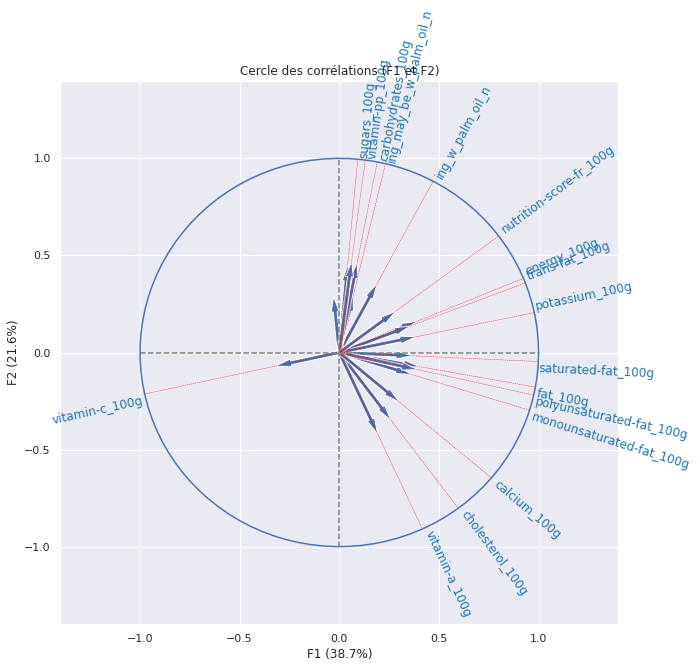

In [94]:
x_y = (0,1)
correlation_graph(pca_pnns,x_y,features, min_inertie = 0.22)

In [95]:
X_proj = pca_pnns.transform(X_scaled)

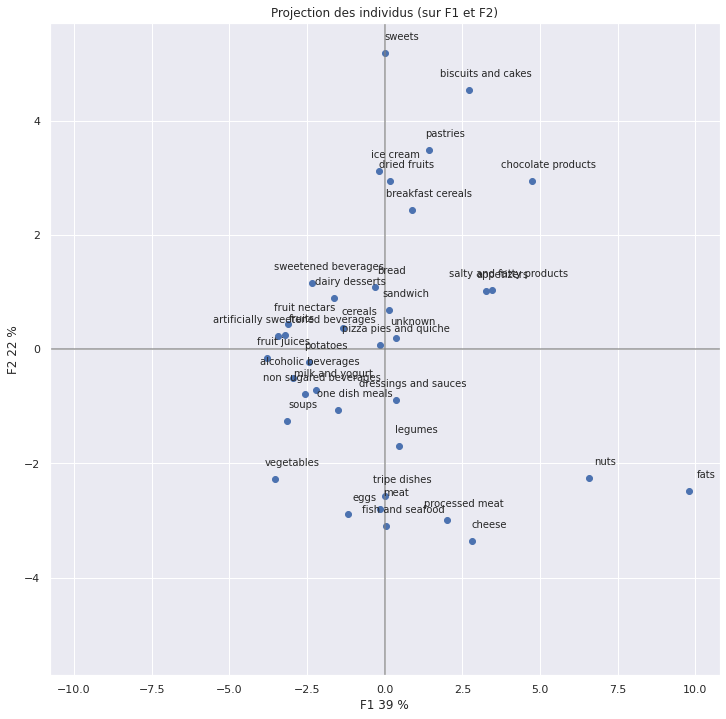

In [96]:
x_y = [0,1]
display_factorial_planes(X_proj, x_y, pca_pnns, labels=names, figsize=(12,12),fontsize = 10, marker="o")

In [97]:
#split data
X = df.select_dtypes(include = 'float').values
features = df.select_dtypes(include = 'float').columns
X_scaled = scaler.transform(X)

In [98]:
X_proj = pca_pnns.transform(X_scaled)
X_proj = pd.DataFrame(X_proj, columns = ['F1','F2','F3','F4'])

In [101]:
df1 = X_proj
df2 = df[['pnns_groups_2','pnns_groups_1', 'nutrition_grade_fr']]
df_graph = df1.join(df2)
cond = df_graph['pnns_groups_2'] != 'unknown'
df_graph = df_graph[cond]

In [102]:
df_graph.describe()

F1             F2             F3             F4
count  189992.000000  189992.000000  189992.000000  189992.000000
mean        0.253687       0.374828       0.093483      -0.179816
std        10.488095       9.567210       9.687600      10.558001
min     -2426.364189   -2192.387587   -1987.600185    -326.155092
25%        -2.470683      -1.226475      -1.309016      -1.399506
50%        -0.576591       0.524686      -0.215751      -0.206783
75%         2.049292       2.417699       1.243477       0.779304
max      1631.750828     924.031922    1899.581333    3267.212002

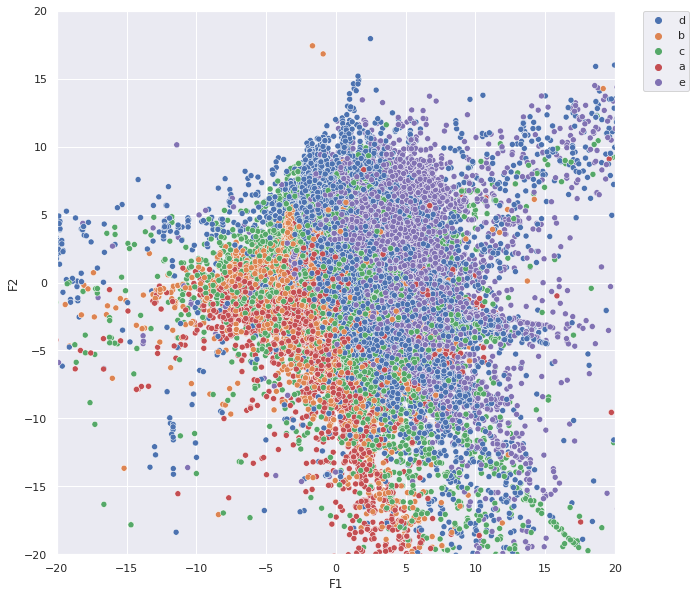

In [103]:
fig, ax = plt.subplots(1,1, figsize=(10,10))

sns.scatterplot(data = df_graph, x = 'F1', y ='F2', hue= 'nutrition_grade_fr', cmap="Set2")

ax.set_xlim(-20,20)
ax.set_ylim(-20,20)
ax.set_xlabel("F1")
ax.set_ylabel("F2")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

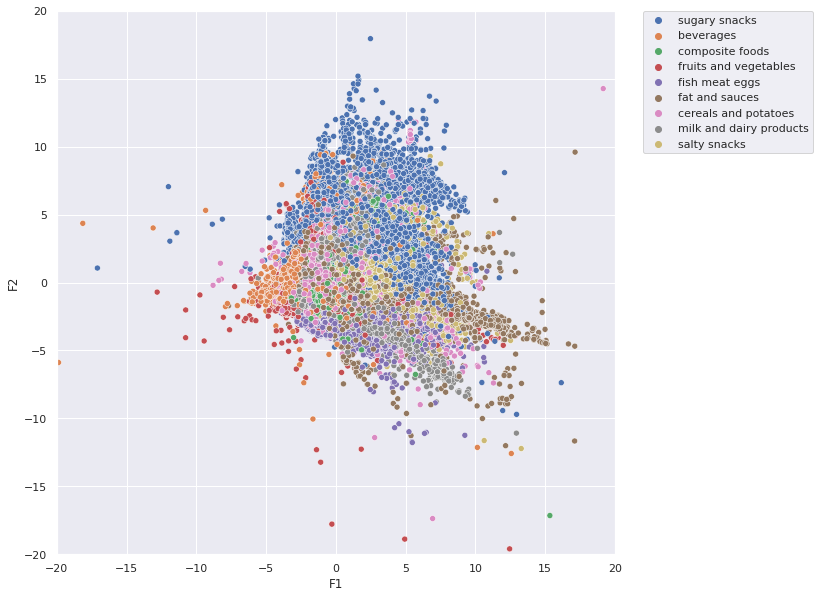

In [104]:
fig, ax = plt.subplots(1,1, figsize=(10,10))

sns.scatterplot(data = df_graph, x = 'F1', y ='F2', hue= 'pnns_groups_1', cmap="Set2")

ax.set_xlim(-20,20)
ax.set_ylim(-20,20)
ax.set_xlabel("F1")
ax.set_ylabel("F2")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

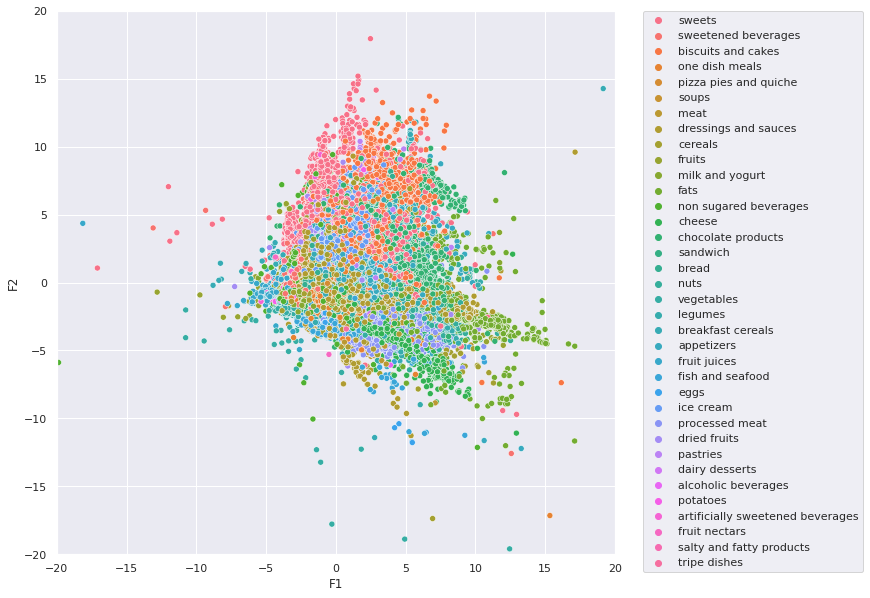

In [105]:
fig, ax = plt.subplots(1,1, figsize=(10,10))

sns.scatterplot(data = df_graph, x = 'F1', y ='F2', hue= 'pnns_groups_2', cmap="Set2")

ax.set_xlim(-20,20)
ax.set_ylim(-20,20)
ax.set_xlabel("F1")
ax.set_ylabel("F2")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)